# Exoplanet Archive 
The data set contains information about discovered exoplanets. It comes from NASA (link to data set Exoplanet Archive:
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). I found this dataset very 
interesting because we can learn a lot about about planets from outside the solar system (that's what exoplanets are) and about other solar systems.

### Tasks:
1. STARS WITH HIGHEST NUMBER OF PLANETS
2. NUMBER OF PLANETS DISCOVERED EVERY YEAR
3. MOST COMOON DISCOVERY METHODS
4. PLANETS BIGGER THAN EARTH (radius)

In [93]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning data

The headings in the csv file are given in abbreviations. Their expansions are given at the beginning of the file.
In order to make the data easier to read, it was necessary to replace them with their full names.

- loading the headers (lines 3 - 290 in the file)

In [94]:
df_exoplanets = pd.read_csv('exoplanets.csv', skiprows=1, nrows=287)
df_exoplanets.head()

,# Thu Jul 21 06:57:21 2022
0,#
1,# COLUMN pl_name: Planet Name
2,# COLUMN hostname: Host Name
3,# COLUMN pl_letter: Planet Letter
4,# COLUMN hd_name: HD ID


- geting headers names

In [95]:
df_exoplanets = df_exoplanets['# Thu Jul 21 06:57:21 2022'].str.split(':', expand=True)
df_exoplanets.rename(columns = {1:'Index'}, inplace = True)
df_exoplanets['Index'][0] = 'Nr'
df_exoplanets['Index'] = df_exoplanets['Index'].str.strip() # in this column there are empty spaces before and after a value
df_exoplanets.head()

,0,Index
0,#,Nr
1,# COLUMN pl_name,Planet Name
2,# COLUMN hostname,Host Name
3,# COLUMN pl_letter,Planet Letter
4,# COLUMN hd_name,HD ID


- loading the corect data

In [96]:
df_exoplanets_sheet = pd.read_csv('exoplanets.csv', skiprows=290)
df_exoplanets_sheet.head()

C:\conda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2009-10,2014-05-14,0,1,1,0,0,0


- changing headers.
The order of the original column names coincides with the order of their expansions

In [97]:
df_exoplanets_sheet.columns = df_exoplanets['Index']
df_exoplanets_sheet.head()

Index,Nr,Planet Name,Host Name,Planet Letter,HD ID,HIP ID,TIC ID,GAIA ID,Default Parameter Set,Number of Stars,...,Kepler Magnitude Lower Unc,Date of Last Update,Planetary Parameter Reference Publication Date,Release Date,Number of Notes,Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2009-10,2014-05-14,0,1,1,0,0,0


- getting rid of unnecessary data

In [98]:
df_exoplanets_sheet = df_exoplanets_sheet[['Host Name', 'Discovery Year', 'Discovery Method', 'Planet Radius [Earth Radius]']]
df_exoplanets_sheet

Index,Host Name,Discovery Year,Discovery Method,Planet Radius [Earth Radius]
0,11 Com,2007,Radial Velocity,NaN
1,11 Com,2007,Radial Velocity,NaN
2,11 UMi,2009,Radial Velocity,NaN
3,11 UMi,2009,Radial Velocity,NaN
4,11 UMi,2009,Radial Velocity,NaN
...,...,...,...,...
32589,ups And,1999,Radial Velocity,NaN
32590,ups And,1999,Radial Velocity,NaN
32591,ups Leo,2021,Radial Velocity,NaN
32592,xi Aql,2007,Radial Velocity,NaN


- checking for NaN values

In [99]:
print('Host Name', df_exoplanets_sheet['Host Name'].isnull().sum())
print('Discovery Year', df_exoplanets_sheet['Discovery Year'].isnull().sum())
print('Discovery Method', df_exoplanets_sheet['Discovery Method'].isnull().sum())
print('Planet Radius [Earth Radius]', df_exoplanets_sheet['Planet Radius [Earth Radius]'].isnull().sum())

Host Name 0
Discovery Year 0
Discovery Method 0
Planet Radius [Earth Radius] 9863


- replacing NaN values in column "Planet Radius [Earth Radius]", which is needed in task no. 4. NaN values are replaced
with -1 to count how many exoplanet sizes we don't know

In [100]:
df_exoplanets_sheet['Planet Radius [Earth Radius]'] = df_exoplanets_sheet['Planet Radius [Earth Radius]'].fillna(-1)

# Tasks
1. STARS WITH HIGHEST NUMBER OF PLANETS

In [101]:
stars = pd.DataFrame(df_exoplanets_sheet.groupby('Host Name').size().sort_values(ascending=False))
stars.columns = ['Nr of exoplanets']
stars = stars.head(10)
stars = stars.reset_index()
stars

,Host Name,Nr of exoplanets
0,Kepler-11,85
1,Kepler-32,76
2,Kepler-186,75
3,Kepler-296,69
4,Kepler-80,62
5,Kepler-33,62
6,KOI-351,62
7,Kepler-20,60
8,Kepler-26,60
9,Kepler-235,58


<Figure size 432x288 with 0 Axes>

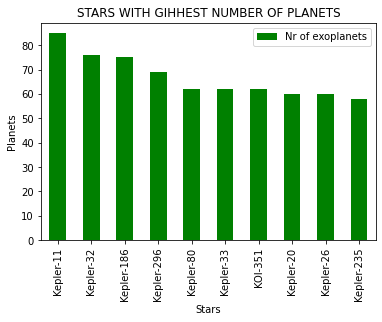

In [102]:
fig = plt.figure()
ax1 = stars.plot.bar(x='Host Name', y='Nr of exoplanets', rot=0,color = 'green')
ax1.set_xlabel('Stars')
ax1.set_ylabel('Planets')
ax1.set_title('STARS WITH GIHHEST NUMBER OF PLANETS')
ax1.tick_params(axis='x', labelrotation=90)

2. NUMBER OF PLANETS DISCOVERED EVERY YEAR

In [103]:
discovery_year = pd.DataFrame(df_exoplanets_sheet.groupby('Discovery Year').size())
discovery_year.columns = ['Number']
discovery_year = discovery_year.reset_index()
discovery_year.head(30)

,Discovery Year,Number
0,1989,3
1,1992,6
2,1994,2
3,1995,5
4,1996,41
5,1997,3
6,1998,37
7,1999,74
8,2000,71
9,2001,53


Text(0.5, 1.0, 'Discoveries timeline')

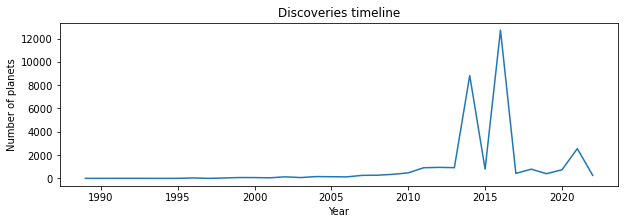

In [104]:
fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot()
ax1.plot('Discovery Year', 'Number', data = discovery_year)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of planets')
ax1.set_title('Discoveries timeline')

3. BEST DISCOVERY METHODS

In [105]:
discovery_method = pd.DataFrame(df_exoplanets_sheet.groupby('Discovery Method').size().sort_values(ascending=False))
discovery_method.columns = ['Count']
discovery_method = discovery_method.reset_index()
discovery_method

,Discovery Method,Count
0,Transit,29869
1,Radial Velocity,2075
2,Microlensing,359
3,Transit Timing Variations,120
4,Imaging,112
5,Eclipse Timing Variations,24
6,Orbital Brightness Modulation,19
7,Pulsar Timing,12
8,Pulsation Timing Variations,2
9,Astrometry,1


3. NUMBER OF PLANETS BIGGER THAN EARTH

In [106]:
eart_radius = 1 # data values are in relation to size of earth's radius
df_exoplanets_sheet['Planet Radius [Earth Radius]'] = df_exoplanets_sheet['Planet Radius [Earth Radius]'].fillna(-1)
radius = pd.DataFrame(df_exoplanets_sheet['Planet Radius [Earth Radius]'].tolist())
count = pd.DataFrame({'Equal':radius[radius == 1].count()})
count['Bigger'] = pd.DataFrame(radius[radius > eart_radius].count())
count['Smaller'] = pd.DataFrame(radius[(radius < eart_radius) & (radius > 0)].count())
count['No data'] = pd.DataFrame(radius[radius == -1].count())
count_transposed = count.T
count_transposed = count_transposed.reset_index()
count_transposed.columns = ['Radius', 'Count']
count_transposed

,Radius,Count
0,Equal,55
1,Bigger,21399
2,Smaller,1277
3,No data,9863


Text(0.5, 1.0, 'Size of planets in comparison to Earth')

<Figure size 432x288 with 0 Axes>

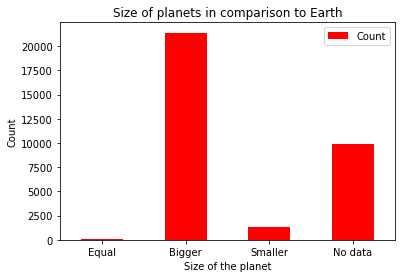

In [107]:
fig = plt.figure()
ax1 = count_transposed.plot.bar(x='Radius', y='Count', rot=0,color = 'red')
ax1.set_xlabel('Size of the planet')
ax1.set_ylabel('Count')
ax1.set_title('Size of planets in comparison to Earth')